## Analyse eines Gamma-Strahlen Blitzes (GRB)
Gamma-Strahlen Blitze sind kosmische Ereignisse bei denen in sehr kurzer Zeit extreme Energiemengen in Form von Strahlung abgegeben werden. Die geschätzte Menge an Energie die bei einem GRB typischerweise ausgestoßen wird liegt bei $10^{44}$ J, was nach der Formel $E=mc^2$ einer Masse von fast 200 Erdmassen entspricht. Die Strahlung wird dabei entlang der Rotantionsachse in zwei sogenannte Jets gebündelt, wodurch GRBs für uns über sehr große Distanzen detektierbar sind (~ 120 Mio. Ly - 13 Mrd. Ly).   
Wir unterscheiden dabei zwei Arten von GRBs:


*   **Long GRBs**:  
Die Forschung geht heute davon aus, dass lange Gammablitze entstehen wenn sehr massereiche Sterne am Ende ihres Lebens explodieren. Dabei kommt es zum Graviationskollaps durch den ein sehr kompaktes Objekt wie ein Neutronen Stern oder ein schwarzes Loch entsteht mit einer Akkretionsscheibe.  
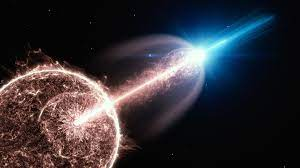(künstlerische Darstellung eines langen GRBs)

> Eigenschaften:
> * Dauer: >2s, typisch ~30s
> * 75% der GRBs sind lang
> * Über sehr große Distanzen messbar
> * Helles Nachglühen

*   **short GRBs**
Bei kurzen GRBs geht man davon aus, dass sie entstehen wenn ein System aus zwei kompakten Objekten -- zwei Neutronen Sterne oder Neutronen Stern und Schwarzes Loch -- verschmilzt. Die räumlich Ausdehnung dieses Systems ist deutlich kleiner verglichen mit der eines massereichen Sternes, weswegen auch der Blitz zeitlich kürzer sein kann.  
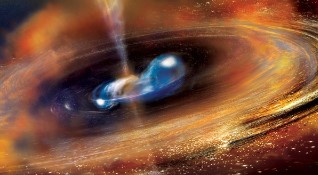(künstlerische Darstellung eines kurzen GRBs)
>Eigenschaften:
> * Dauer: <2s, typisch ~0.3s
> * weniger Energiereich als lange GRBs
> * selten und schwächeres Nachglühen





## Fermi-LAT Daten
Das Large-Area-Telescope des Fermi satelliten misst $\gamma$-rays zwischen 20 MeV und 300 GeV. Dabei werden für jedes Event u.a. die Zeit, die Energie und die Richtung bestimmt.  
Die Energie wird typischerweise in eV angegeben, wobei 1 eV der Energie entspricht, die eine Elementarladung $e$ erhält wenn sie eine Spannung von 1 V durchläuft. Der Faktor "M" oder "G" stehen dann für eine Million bzw. eine Milliarde eV.   
Die Richtung aus der ein $\gamma$ gekomment ist wird dabei in galaktischen Koordinaten angegeben, (Länge, Breite).
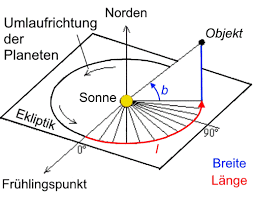 

Jedem Punkt am Himmel werden werden zwei Winkel zugeordnet: 
* Die Länge (0° - 360°), die sagt in welcher Richtung in der Planetenebene sich der Punkt befindet 
* Die Breite (-90° - +90°), die sagt wie weit über oder unterhalb der Ebene der Punkt liegt

In dieser Übung werden wir alle $\gamma$ die in einem gewissen Zeitraum gemessen wurden als Tabelle laden.

## Arbeiten mit dem Notebook
Das Notebook ist aus verschiedenen Zellen aufgebaut, mit Code der individuell ausgeführt werden kann. Dabei ist darauf zu achten, dass bestimmte Zellen Variablen brauchen, die von vorherigen Zellen in den Arbeitsspecher geladen wurden. Deswegen führt man generell die Zellen von oben nach unten der Reihe nach aus, kann aber auch die Werte in einer Zelle verändern und diese dann erneut ausführen.  
Das Ausführen einer Zelle funktioniert entweder mit `Shift`+`Enter` wenn sich der Kursor in der Zelle befindet oder per Mausklick auf das "Play"-Symbol oben links in der Zelle.  
Bereiche in Zellen in denen ihr Änderungen vornehmen sollt sind markiert mit: 


```
##############################
ntbins = 1 ### Anzahl der Bins
tmin = 1 ### Startzeit
tmax = 1 ### Endzeit
##############################
```

Außerhalb der so markierten Bereiche müsste ihr nichts ändern, sondern nur die Zellen ausführen wie sie sind!  
In dieser Übung sollt ihr veruchen möglichst sinnvolle Werte für die Variablen zu finden und so folgende Fragen beantworten:

1.   **Die Position des GRB in galaktischen Koordinaten**  
  Alle $\gamma$ werden entsprechend ihrer rekonstruierten Position in eine Himmelsprojektion gefüllt. 
2.   **Die Startzeit und Dauer des GRB**  
  Alle $\gamma$ werden entsprechend der detektierten Zeit in ein Histogramm gefüllt.

Versucht dazu den entsprechenden Variablen, die die Histogramme karakterisieren, verschiedene Werte zu geben. Findet solche, die euch ein möglichst klares Bild von dem Ereignis geben und lest die gefragten Werte aus den Plots ab.

Bei Fragen wendet euch gerne an uns oder fragt Google 😉





Adapted by Aakash Bhat and Dmitry Malyshev from https://colab.research.google.com/drive/1-hyY4SoEoQJT9reDUX7WQ4S2J_fWxZhr

(Elisabetta Bissaldi, Francesco de Palma, Leonardo Di Venere and Fabio Gargano)

First we import the required libraries which shall help us read and plot our required data.


In [28]:
# import libraries
import os,sys
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from astropy.table import Table
import astropy
import numpy as np
import time, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, figure, clf
from IPython.display import display, clear_output, Image
from imageio import imread, mimsave

import warnings
warnings.simplefilter("ignore")

### need to upload files for 2 and 3
links = {1: 'https://raw.githubusercontent.com/tunbehaun273/Fermi-Masterclass/main/data/L210409094729A331483C79_PH00.csv',
         2: 'https://raw.githubusercontent.com/tunbehaun273/Fermi-Masterclass/main/data/L210409094729A331483C79_PH00.csv',
         3: 'https://raw.githubusercontent.com/tunbehaun273/Fermi-Masterclass/main/data/L210409094729A331483C79_PH00.csv'}

We first define a function which converts MET data which is in seconds to a date and time based on a reference time


In [2]:
# Define a function that transformes mission elapsed time (MET) to normal date and time
met0 = datetime.datetime(2001,1,1,0,0,0) #reference time
def met2date(met_seconds):
  return met0 + datetime.timedelta(seconds=met_seconds)

#Current Time and Date:
now = datetime.datetime.now()
print ("Current time and date: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))
#in MET format (seconds from reference time) 
dsec=(now-met0).total_seconds()
print ("Current MET: ")
print(dsec)
#If we use the previous function with hourly METs, we obtain the current value again.
print ("Current date obtained with the function : ")
print (met2date(dsec))
print("As you can see, the current date and the date obtained by applying the function coincide.")

Current time and date: 
2023-01-27 11:00:09
Current MET: 
696510009.86212
Current date obtained with the function : 
2023-01-27 11:00:09.862120
As you can see, the current date and the date obtained by applying the function coincide.


In [26]:
Table.read('https://raw.githubusercontent.com/tunbehaun273/Fermi-Masterclass/main/data/L210409094729A331483C79_PH00.csv', delimiter=';')

﻿ENERGY,L,B,TIME
float64,float64,float64,float64
219.1508026123047,262.865478515625,-20.93785285949707,243216773.29129252
160.13931274414062,271.4554748535156,-13.987093925476074,243216405.99857077
174.37135314941406,268.7574768066406,-14.114494323730469,243216677.16814733
523.5563354492188,267.94500732421875,-16.138046264648438,243216696.2966625
301.2044677734375,270.0207214355469,-13.936010360717773,243216769.64509803
154.85987854003906,268.8592529296875,-11.688334465026855,243216770.57706016
292.0396728515625,269.3240051269531,-13.22767162322998,243216770.5880356
256.416015625,269.7627258300781,-13.245923042297363,243216771.31549177
125.69283294677734,270.3750915527344,-14.3324556350708,243216771.33452037


In [3]:
# new way of importing data from FAU box
#link = "https://faubox.rrze.uni-erlangen.de/getlink/fiV5VXuetAraZR28jyivyr/L210409094729A331483C79_PH00.csv"
link = 'https://faubox.rrze.uni-erlangen.de/download/Mk11NkNOWlg2VkRLcmFmejduMkh5/L210409094729A331483C79_PH00.csv'
fname = 'L210409094729A331483C79_PH00.csv'
cmd = 'wget %s' % (link)
print(cmd)

wget https://faubox.rrze.uni-erlangen.de/download/Mk11NkNOWlg2VkRLcmFmejduMkh5/L210409094729A331483C79_PH00.csv


In [4]:
os.system(cmd)

0

In [5]:
# the file is copied and it exists in the working directory
os.path.isfile(fname)

True

In [6]:
ff = open(fname)

In [21]:
st = ff.readline()

In [22]:
st

'    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n'

In [23]:
print(ff.read())

    <meta name="viewport" content="width=device-width, initial-scale=1"/>
    <meta name="title" content=" Login - FAUbox "/>
    <meta name="description" content="Share, sync and backup your files online"/>

    <title>
    Login - FAUbox
    </title>

    
    <script src="/js/picasso/lang.js"></script>

    <link rel="stylesheet" href="/css/glyphicons/glyphicons-filetypes.css"/>
    <link rel="stylesheet" href="/css/glyphicons/glyphicons.css"/>

    <link rel="stylesheet" href="/css/bootstrap/bootstrap.min.css"/>
    <link rel="stylesheet" href="/css/bootstrap/bootstrap-theme.min.css"/>

    <link rel="stylesheet" href="/css/picasso.css"/>
    <link rel="stylesheet" href="/css/ck.css"/>
    <link rel="stylesheet" href="/branding/web.css"/>


    
    <noscript>
        <div class="pica-content pica-boxes">
            <div class="pica-box alert alert-danger">
                <h5>
                    <span class="pica-glyph glyphicons glyphicons-exclamation-sign"></span>
            

In [9]:
# but for some reason pyfits cannot open it (it works OK on my computer)
table = Table.read(fname)

InconsistentTableError: ignored

Fermi LAT data works with FITS files and these may be read from the server or downloaded and upload to a cloud

In [ ]:
# old way of importing the data from google drive
source_name = 'GRB_090510'
fname = "GRB_090510_5deg.fits"
# download the datafile to the working directory
#link = "https://drive.google.com/u/0/uc?id=1BHkMGmvplHokIcQlj3BPwuY3YHzPq5p6&export=download"
#link = "https://drive.google.com/u/0/uc?id=19hqD7TViPgCJq7gKlzCK4SsycvG15Puf&export=download"
#link = "https://drive.google.com/u/0/uc?id=1OrG6lRshRZbc8MzhN9jxjQNVRis16MrF&export=download"
!wget --no-check-certificate --progress=bar:force '$link'  -O  $fname
hdu = pyfits.open(fname)


--2023-01-26 15:32:53--  http://$link/
Resolving $link ($link)... failed: Name or service not known.
wget: unable to resolve host address ‘$link’


OSError: ignored

In [35]:
# Daten einlesen
#################################
###-- wählt hier eure Daten --###
datensatz = 2   # mögliche Datensätze [1,2,3]
###---------------------------###
#################################

filelink = links[datensatz]
table = Table.read(filelink, delimiter=';')
n_events = len(table)
print(f'Es wurden {n_events} Events eingelesen')
n_show = min(10, n_events)
table[:n_show].show_in_notebook()

Es wurden 222 Events eingelesen


idx,﻿ENERGY,L,B,TIME
0,219.1508026123047,262.865478515625,-20.93785285949707,243216773.29129252
1,160.13931274414062,271.4554748535156,-13.987093925476074,243216405.99857077
2,174.37135314941406,268.7574768066406,-14.114494323730469,243216677.16814733
3,523.5563354492188,267.94500732421875,-16.138046264648438,243216696.2966625
4,301.2044677734375,270.0207214355469,-13.936010360717773,243216769.64509803
5,154.85987854003906,268.8592529296875,-11.688334465026855,243216770.57706016
6,292.0396728515625,269.3240051269531,-13.22767162322998,243216770.5880356
7,256.416015625,269.7627258300781,-13.245923042297363,243216771.31549177
8,125.69283294677734,270.3750915527344,-14.3324556350708,243216771.33452037
9,151.3258056640625,269.6025695800781,-15.619322776794434,243216771.38430968


In [ ]:
# have a quick look at the table
max_events_input = 10 #Number of rows to see
table = Table(hdu[1].data)
#tab2 = Table(hdu2[1].data)
max_events = min(max_events_input, len(table))
table[:max_events].show_in_notebook()
#times=hdu1[1].data.field("TIME")


idx,ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
0,264.5528,333.0068,-23.027023,30.411175,-53.82001,10.483409,222.22835,48.82428,187.55508,263607783.87700403,3475583,263605997,0,0 .. 0,False .. True,False .. True,0,77.55157133936882,0.0,0.0,0.0,0.0,0.0
1,299.7934,334.23633,-24.664268,28.130974,-55.302532,11.569481,231.18065,50.316376,185.73695,263607782.620678,3471696,263605997,0,0 .. 0,False .. True,False .. False,1,76.29524531960487,0.0,0.0,0.0,0.0,0.0
2,132.95584,338.3377,-26.657797,25.780865,-59.306484,13.096994,249.57004,52.095097,180.86671,263607782.77282444,3472604,263605997,0,0 .. 0,False .. True,False .. False,1,76.44739174842834,0.0,0.0,0.0,0.0,0.0
3,161.18507,335.60132,-24.73426,28.486742,-56.528515,11.341188,237.28673,50.28054,184.1376,263607782.7955843,3472687,263605997,0,0 .. 0,False .. True,False .. False,1,76.4701516032219,0.0,0.0,0.0,0.0,0.0
4,285.37683,335.36884,-25.331858,27.348948,-56.445663,11.969785,236.75436,50.892727,184.37567,263607783.0820689,3473678,263605997,0,0 .. 0,False .. True,False .. False,1,76.75663620233536,0.0,0.0,0.0,0.0,0.0
5,222.54605,334.5763,-24.784061,28.04255,-55.629944,11.60421,232.68016,50.40811,185.3724,263607783.2249971,3474082,263605997,0,0 .. 0,False .. True,False .. True,0,76.89956441521645,0.0,0.0,0.0,0.0,0.0
6,420.59003,337.3287,-25.203035,28.232948,-58.157364,11.636352,245.24818,50.664062,182.11665,263607783.2758165,3474214,263605997,0,0 .. 0,False .. True,False .. False,1,76.9503838121891,0.0,0.0,0.0,0.0,0.0
7,212.48029,336.79626,-27.622768,23.563898,-58.087265,14.078058,243.58034,53.10169,182.62935,263607783.72554162,3475238,263605997,0,0 .. 0,False .. True,False .. True,0,77.40010893344879,0.0,0.0,0.0,0.0,0.0
8,135.72122,338.08676,-26.460619,26.09211,-59.053818,12.88836,248.33559,51.900566,181.25343,263607784.00152564,3475846,263605997,0,0 .. 0,False .. True,False .. True,0,77.67609295248985,0.0,0.0,0.0,0.0,0.0
9,101.24417,339.00198,-27.675806,23.945066,-60.03197,14.1346855,251.14606,53.100773,180.36154,263607786.009946,3479892,263605997,0,0 .. 0,False .. True,False .. False,1,79.68451330065727,0.0,0.0,0.0,0.0,0.0


In [ ]:
times = table["TIME"]
glon = table["L"]
glat = table["B"]
print('Range of times in seconds: %i' % (max(times) - min(times)))
print("Mean GLON = %.2f deg, mean GLAT = %.2f deg" % (np.mean(glon), np.mean(glat)))

Range of times in seconds: 1165
Mean GLON = 24.44 deg, mean GLAT = -55.10 deg


## Task 1: Determine approximately the position of the GRB in Galactic coordinates
- change glon_min, glon_max, glat_min, glat_max parameters to iteratively zoom in to the position of the sourcs
- you can also change nxybins parameter to make courser or finer binning


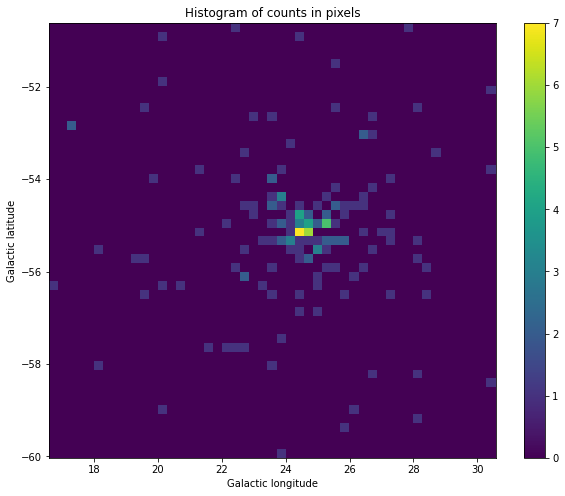

In [ ]:
# change parameters here
initial_guess = True
if initial_guess:
    nxybins = 50
    glon_min = min(glon)
    glon_max = max(glon)
    glat_min = min(glat)
    glat_max = max(glat)
else:
  nxybins = 15
  glon_min = 22
  glon_max = 28
  glat_min = -56
  glat_max = -54


# definition of bins
glon_bins = np.linspace(glon_min, glon_max, nxybins)
glat_bins = np.linspace(glat_min, glat_max, nxybins)

# plot 2D histogram of counts of gamma-rays in pixels
fig, ax = plt.subplots(figsize=(10,8))
counts, xedges, yedges, im = ax.hist2d(glon, glat, bins=(glon_bins, glat_bins))
cbar = plt.colorbar(im, ax=ax)
plt.title("Histogram of counts in pixels");
plt.xlabel("Galactic longitude");
plt.ylabel("Galactic latitude");

## Task 1 answer
(replace X and Y with your answer)
- Galactic longitude of the source = X
- Galactic latitude of the source = Y

### Task 1 correct answer
- glon0 = 24.59762
- glat0 = -55.07647


## Task 2: Determine the start time and duration of the burst
- change tmin, tmax, ntbins parameters to iteratively zoom in to the starting time of the burst

In [ ]:
# shift the times of arrival of gamma rays so that the biginning of observation is at 0
tmin0 = min(times)
tmax0 = max(times)
delta_times = times - tmin0

initial_guess = True ### Change to False for zooming in
if initial_guess:
  ntbins = 100
  tmin = 0
  tmax = (tmax0 - tmin0)
else:
  ntbins = 40 ### Change here to select the number of bins
  tmin = 265 ### Change here for the starting time
  tmax = 275 ### Change here for the end time


tbins = np.linspace(tmin, tmax, ntbins)


Text(0, 0.5, 'Number of photons')

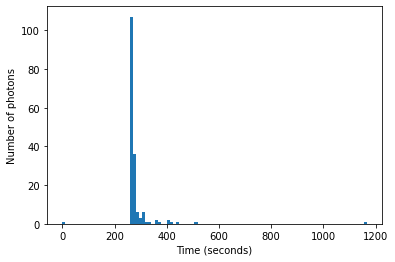

In [ ]:
hist_data = plt.hist(delta_times, bins=tbins)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of photons')

In [ ]:
fname = '%s_time_histogram.pdf' % source_name
print('Save figure to file: %s' % fname)
plt.savefig(fname)

Save figure to file: GRB_090510_time_histogram.pdf


<Figure size 432x288 with 0 Axes>

## Task 2 answer


In [ ]:
# Put your answer in relative seconds here (instead of 0.0)
t_begin = 268.5

# Transform to the original MET seconds and determine the date
t_begin_MET = tmin0 + t_begin
date_time = met2date(t_begin_MET)
print('Burst start (MET) = %.1f' % t_begin_MET)
print('Burst start = %s' % date_time)


Burst start (MET) = 263607782.0
Burst start = 2009-05-10 00:23:01.962145


## Task 2 correct answer


In [ ]:
t_begin_MET = 263607781.970
date_time = met2date(t_begin_MET)
print('Burst start (MET) = %.1f' % t_begin_MET)
print('Burst start = %s' % date_time)

Burst start (MET) = 263607782.0
Burst start = 2009-05-10 00:23:01.970000


Finally here we can visualize the flare up (we can play around with values for differen sources)

In [ ]:
n_map = 10
dt_map = (tmax0 - tmin0) / n_map
tbins_map = np.linspace(0, tmax0 - tmin0, n_map + 1)

delta_xy = 4.
xmin = np.mean(glon) - delta_xy / 2.
xmax = np.mean(glon) + delta_xy / 2.
ymin = np.mean(glat) - delta_xy / 2.
ymax = np.mean(glat) + delta_xy / 2.

xbins = np.linspace(xmin, xmax, 20)
ybins = np.linspace(ymin, ymax, 20)

# select max value
max_array = []
for i in range(len(tbins_map)-1):
    tmask = (times > tbins_map[i] + tmin0) & (times < tbins_map[i+1] + tmin0)  
    glon_imap = glon[tmask]
    glat_imap = glat[tmask] 
    counts, xedges, yedges, im = ax.hist2d(glon_imap, glat_imap, bins=(xbins, ybins))
    max_array.append(np.max(counts))
max_val = max(max_array)
print(max_val)


7.0


In [ ]:
pngs = []

for i in range(len(tbins_map)-1):
    tmask = (times > tbins_map[i] + tmin0) & (times < tbins_map[i+1] + tmin0)  
    glon_imap = glon[tmask]
    glat_imap = glat[tmask]
    fig, ax = plt.subplots(figsize=(10,8))
    counts, xedges, yedges, im = ax.hist2d(glon_imap, glat_imap, 
                                           bins=(xbins, ybins), 
                                           vmin=0, vmax=max_val/2);
    cbar = plt.colorbar(im, ax=ax)
    plt.title("Counts in pixels from %i to %i sec" % (tbins_map[i], tbins_map[i+1]))
    #plt.title(i)
    plt.xlabel("Galactic Longitude")
    plt.ylabel("Galactic Latitude")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    filename = 'image_%i.png' % i
    fig.savefig(filename)
    clf(); # clear figure
    pngs.append(filename)

images = []
for png in pngs:
    img = imread(png)
    images.append(img)
mimsave('temp.gif', images, fps=1)

#!ls



<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

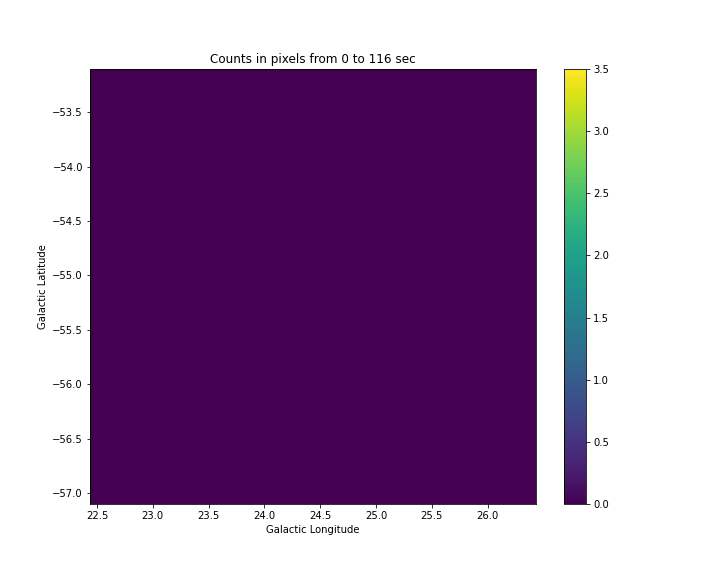

In [ ]:
with open('temp.gif','rb') as f:
    im = Image(data=f.read(), format='png');
    display(im)